# Find optimal theta parameters for food truck profit data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Verimizdeki İlk sütun bir şehrin nüfusu ve ikinci sütun o şehirdeki bir gıda kamyonunun kârıdır.
df = pd.read_csv("ex1data1.txt", sep=",",names=["x","y"])

In [3]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X=df.iloc[:,0].values
print(X)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [5]:
y=df.iloc[:,1].values
print(y)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


In [6]:
#y np.reshape yapmamızın nedeni; y tek boyutlu olduğundan dolayı (47,) şeklindedir. matris çarpımı yapabilmek için bunu (47,1) şeklinde güncelliyoruz.
y=np.reshape(y,(len(y),1))
print(y[0:5])

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


In [7]:
m=len(y) # eğitim örneği sayısı.

In [8]:
X=np.concatenate([np.ones((m,1)),X.reshape(97,1)],axis=1)

In [9]:
# X'e 1 lerden oluşan yeni bir column ekliyoruz(1 olma nedeni x0'ı ekliyoruz x0=1 dir)
print(X[1:5])

[[1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [10]:
# create theta parameters.
theta=np.zeros((2,1),dtype=int)
print(theta)

[[0]
 [0]]


### Compute Cost

In [11]:
# J maliyet fonksiyonunu compute_cost fonksiyonu ile hesapıyoruz.
# 1. h hipotezimizi hesaplarken; np.dot ile x ile theta ya matris çarpımı uyguluyoruz. np dot yerine @ simgesini de kullanabiliriz.
# 2. for içinde hatayı hesaplıyoruz ve temp değişkende biriktiriyoruz.
# 3. Son olarak maliyet fonksiyonumuzu formüle uygun şekilde çıkartıyoruz.
def compute_cost(X,y,theta):
    J=0
    h=np.dot(X,theta)
    temp=0
    for i in range(0,m):
        temp+=np.square((h[i]-y[i]))
    J=(1/(2*m))*temp;
    return J

In [12]:
# Kullandığımız theta değerleri ile aldığımız maliyet budur.
compute_cost(X,y,theta)

array([32.07273388])

In [13]:
# Vektör yöntemi ile hesaplanışı
(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))

32.072733877455676

### Gradient Descent

In [14]:
# Gradyan iniş algoritmasında kullanmak için iterasyon ve alpha değerlerimizi belirliyoruz.
iterations = 1500
alpha = 0.01

In [15]:
theta=np.zeros((2,1),dtype=int)
theta

array([[0],
       [0]])

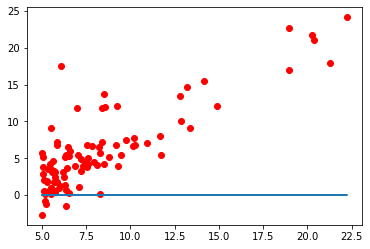

In [16]:
# optimal theta değerlerini bulmadan önceki tahminimiz.
plt.scatter(X[:,1],y,color="red")
plt.plot(X[:,1],np.dot(X,theta))

In [17]:
# y verimiz 97 elemandan oluşuyor, matris çarpımı yapabilmek için y'nin boyutunu 97,1 olarak reshape methodu ile güncelliyoruz.
y.shape

(97, 1)

In [18]:
y=y.reshape(97,1)
y.shape

(97, 1)

In [22]:
def gradient_descent(X,y,theta,iterations):
    # her iterasyon için aldığımız maliyeti kaydetmek için J_history değişkeni oluşturuyoruz.
    J_history = np.zeros((iterations, 1))
    J_history
    for i in range(0,iterations):
        error=(np.dot(X,theta))-(y)
        theta=theta-((alpha/m)*(np.dot(X.transpose(),error)))
        J_history[i]=compute_cost(X,y,theta)
    return theta,J_history
    

In [23]:
#En uygun thetaları bulduk.
best_theta,J_history=gradient_descent(X,y,theta,iterations)
best_theta

array([[-3.63029144],
       [ 1.16636235]])

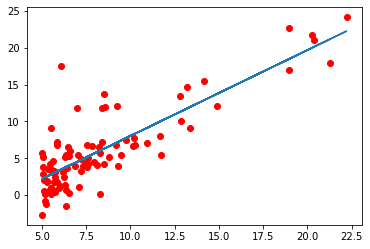

In [21]:
# bulduğumuz optimal theta değerleri ile tahminimizi çizelim.
plt.scatter(X[:,1],y,color="red")
plt.plot(X[:,1],np.dot(X,best_theta))

Text(0.5, 1.0, 'Cost function using Gradient Descent')

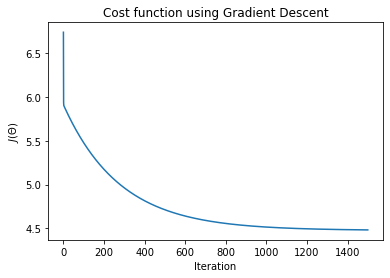

In [26]:
#gradient descent sayesinde J'nin düşüşünü görselleştiriyoruz.
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

# Find optimal theta parameters for house price data

In [23]:
# Verimizdeki İlk sütun evin büyüklüğü (feet kare), ikinci sütun yatak odası sayısı ve üçüncü sütun evin fiyatıdır.
df = pd.read_csv("ex1data2.txt", sep=",",names=["x1","x2","y"])

#### Pandas series ile Compute cost

In [24]:
X=df.iloc[:,:2]

In [25]:
y=df.iloc[:,2]

In [26]:
y=y.values.reshape(len(y),1)

In [27]:
#Değerlere bakıldığında, ev boyutlarının yatak odalarının yaklaşık 1000 katı olduğunu unutmayın. Veri üzerinde özellik ölçeklendirmesi gerçekleştirildiğinde gradyan inişi çok daha hızlı bir şekilde yakınsayabilir.
#X verilerimize standardizasyon uyguluyoruz ve bunun sonucunda verilerin ortalaması 0 standart sapması 1 olur.
# özet olarak gradient descenti hızlandırmak için verileri belirli bir aralığa sıkıştırıyoruzş.
def feature_normalize(X):
    mu=np.mean(X)
    sigma=np.std(X)
    X_norm=(X-mu)/sigma
    return X_norm

In [28]:
# X sütununu standardizasyon uygulanmış hali ile güncelliyoruz.
X=feature_normalize(X)

In [29]:
# Xe X0 olan(1lerden oluşan) değerleri ekliyoruz.
X.insert(loc=0,column="a",value=np.ones(47))

In [30]:
alpha = 0.01;
num_iters = 400;
theta=np.zeros(3).reshape(3,1)

In [31]:
m=len(y)

In [32]:
def compute_cost_multi(X,y,theta):
    return (1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    

### Gradient descent

In [33]:
# iterasyon boyunca Theta ile aldığımız maliyetleri kaydetmek için J_history oluştururuz.
J_history=np.zeros((num_iters,1))

In [35]:
best_theta,J_history=gradientDescentMulti(X,y,theta,alpha,num_iters)

In [36]:
best_theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

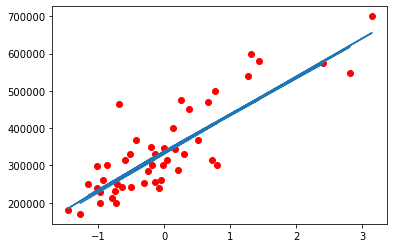

In [37]:
# bulduğumuz optimal theta değerleri ile tahminimizi çizelim.
plt.scatter(X.iloc[:,1],y,color="red")
plt.plot(X.iloc[:,1],np.dot(X,best_theta))

#### NDARRAY ile compute cost

In [76]:
X2=df.iloc[:,:2].values

In [77]:
y=df.iloc[:,2].values

In [81]:
mu=np.mean(X2,axis=0)
mu

array([2000.68085106,    3.17021277])

In [82]:
sigma=np.std(X2,axis=0)
sigma

array([7.86202619e+02, 7.52842809e-01])

In [83]:
X_norm=(X2-mu)/sigma

In [84]:
X2=X_norm

In [85]:
X2=np.concatenate([np.ones((len(X2),1)),X2],axis=1)

In [86]:
for i in range(0,num_iters):
    error=(np.dot(X,theta))-(y.reshape(47,1))
    theta=theta-((alpha/m)*(np.dot(X.transpose(),error)))

In [87]:
theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])